This example is from [Stock Market Data Analysis with Python](https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/)

Also check this
[Stock Market Prediction in Python](http://francescopochetti.com/stock-market-prediction-part-introduction/) 


In [1]:
import pandas as pd
# from pandas.io import data, wb   # Package and modules for importing data; this code may change depending on pandas version
import datetime
from pandas_datareader import data, wb

In [2]:
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()

In [3]:
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = data.DataReader("AAPL", "yahoo", start, end)
 
type(apple)

pandas.core.frame.DataFrame

In [4]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,67649400,103.057063
2016-01-05,105.750000,105.849998,102.410004,102.709999,55791000,100.474523
2016-01-06,100.559998,102.370003,99.870003,100.699997,68457400,98.508268
2016-01-07,98.680000,100.129997,96.430000,96.449997,81094400,94.350769
2016-01-08,98.550003,99.110001,96.760002,96.959999,70798000,94.849671


In [5]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline


Populating the interactive namespace from numpy and matplotlib


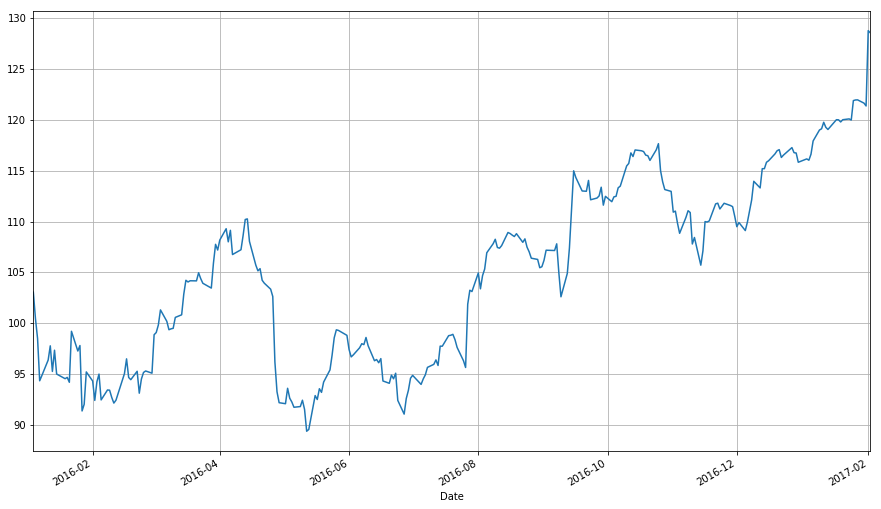

In [6]:
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
apple["Adj Close"].plot(grid = True) # Plot the adjusted closing price of AAPL

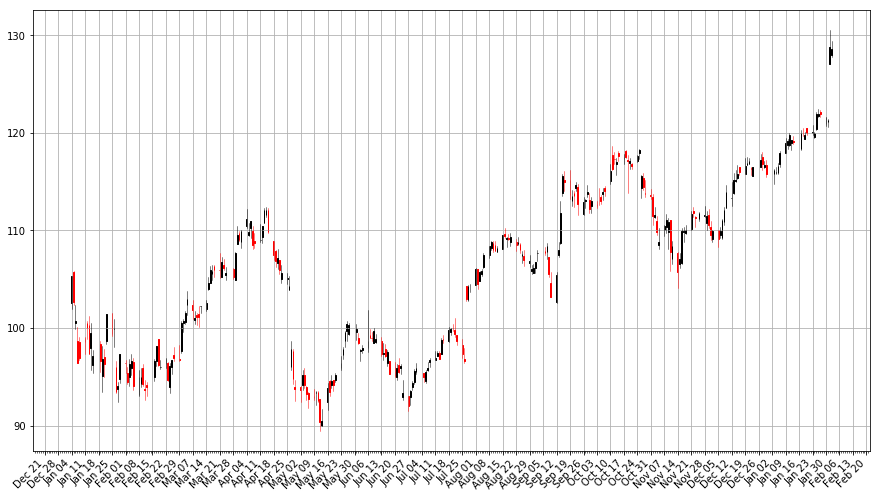

In [7]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
 
pandas_candlestick_ohlc(apple)

In [8]:
microsoft = data.DataReader("MSFT", "yahoo", start, end)
google = data.DataReader("GOOG", "yahoo", start, end)
 
# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
stocks = pd.DataFrame({"AAPL": apple["Adj Close"],
                      "MSFT": microsoft["Adj Close"],
                      "GOOG": google["Adj Close"]})
 
stocks.head()

,AAPL,GOOG,MSFT
Date,,,
2016-01-04,103.057063,741.840027,53.336436
2016-01-05,100.474523,742.580017,53.579760
2016-01-06,98.508268,743.619995,52.606467
2016-01-07,94.350769,726.390015,50.776676
2016-01-08,94.849671,714.469971,50.932406


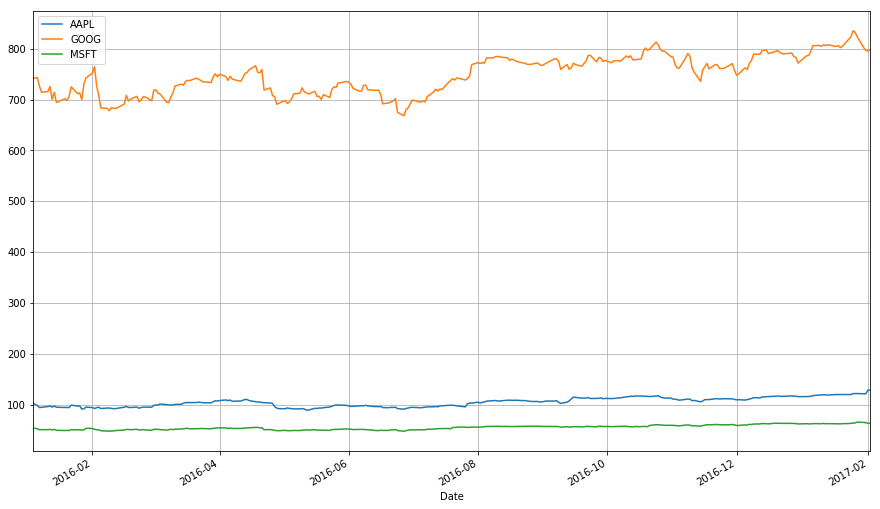

In [9]:
stocks.plot(grid = True)

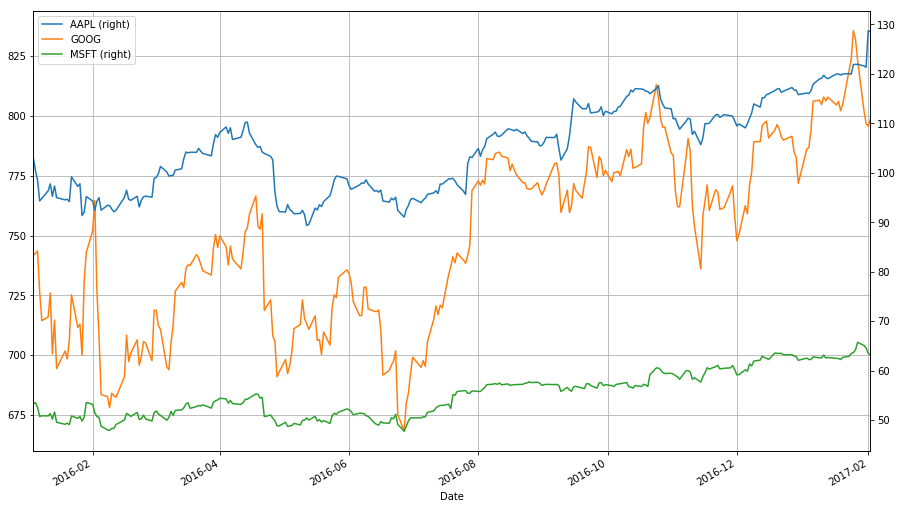

In [10]:
stocks.plot(secondary_y = ["AAPL", "MSFT"], grid = True)

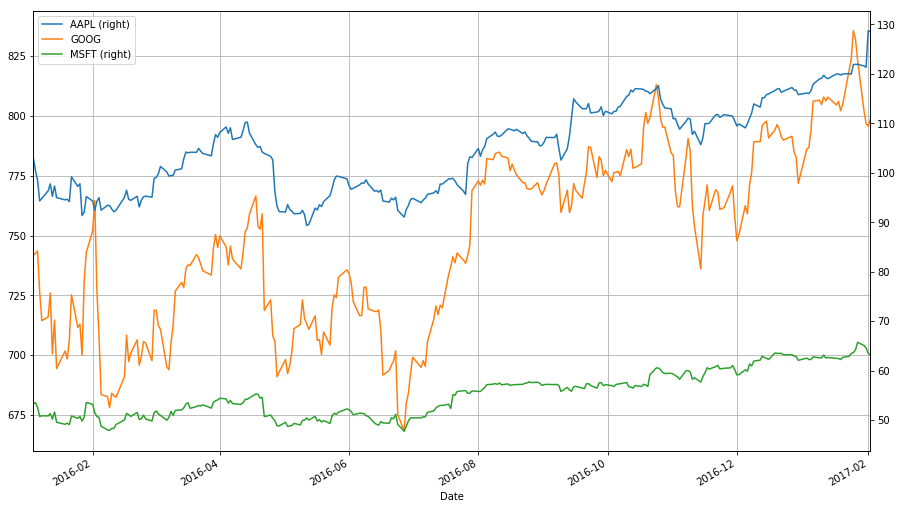

In [11]:
stocks.plot(secondary_y = ["AAPL", "MSFT"], grid = True)

In [12]:
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

,AAPL,GOOG,MSFT
Date,,,
2016-01-04,1.000000,1.000000,1.000000
2016-01-05,0.974941,1.000998,1.004562
2016-01-06,0.955861,1.002399,0.986314
2016-01-07,0.915520,0.979173,0.952007
2016-01-08,0.920361,0.963105,0.954927


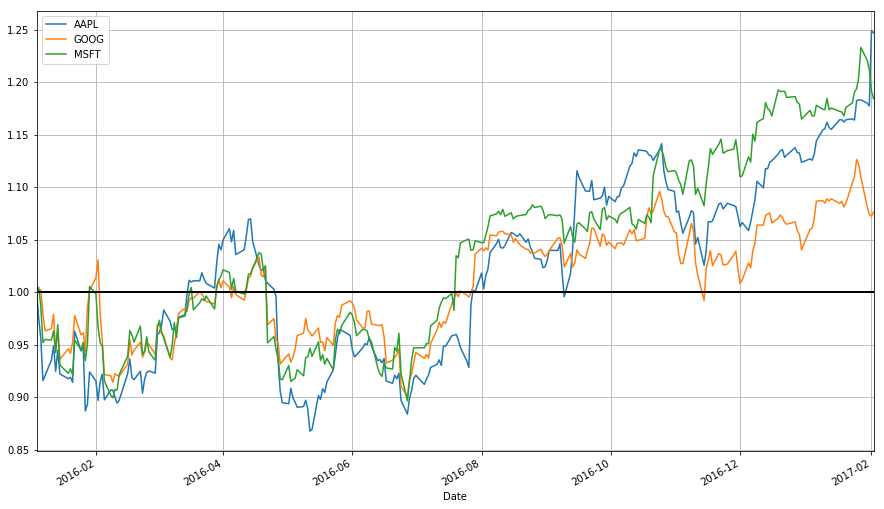

In [13]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

In [15]:
# Let's use NumPy's log function, though math's log function would work just as well
import numpy as np
 
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()


,AAPL,GOOG,MSFT
Date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,-0.025379,0.000997,0.004552
2016-01-06,-0.019764,0.001400,-0.018332
2016-01-07,-0.043121,-0.023443,-0.035402
2016-01-08,0.005274,-0.016546,0.003062


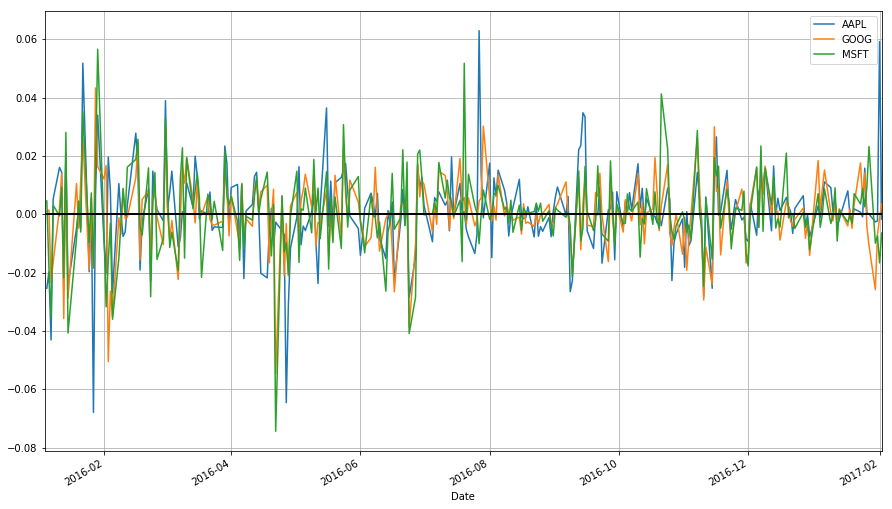

In [16]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

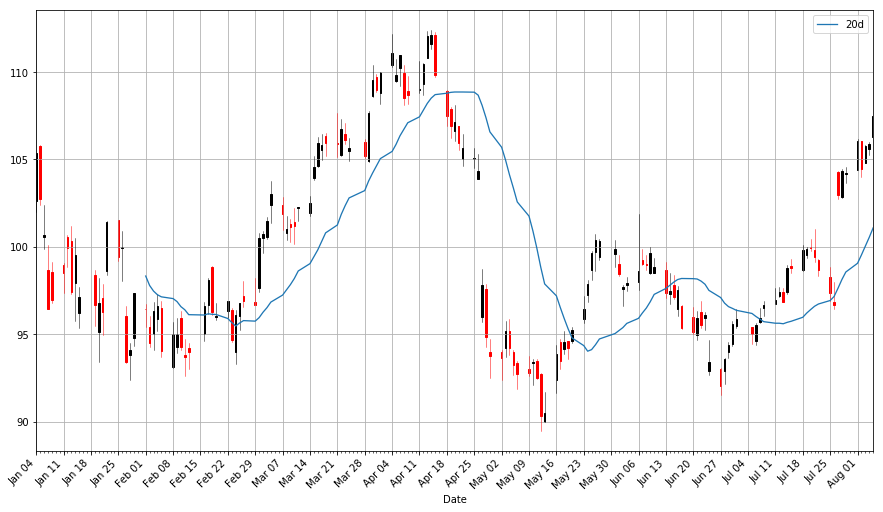

In [17]:
apple["20d"] = np.round(apple["Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-08-07',:], otherseries = "20d")

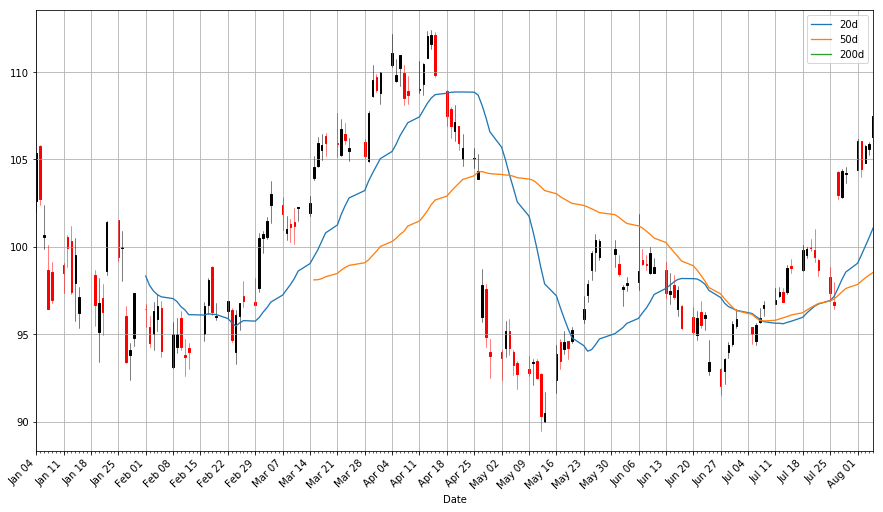

In [18]:
apple["50d"] = np.round(apple["Close"].rolling(window = 50, center = False).mean(), 2)
apple["200d"] = np.round(apple["Close"].rolling(window = 200, center = False).mean(), 2)
 
pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-08-07',:], otherseries = ["20d", "50d", "200d"])

In [19]:
apple['20d-50d'] = apple['20d'] - apple['50d']
apple.tail()

,Open,High,Low,Close,Volume,Adj Close,20d,50d,200d,20d-50d
Date,,,,,,,,,,
2017-01-27,122.139999,122.349998,121.599998,121.949997,20437400,121.949997,119.05,115.33,107.20,3.72
2017-01-30,120.930000,121.629997,120.660004,121.629997,30278800,121.629997,119.29,115.62,107.24,3.67
2017-01-31,121.150002,121.389999,120.620003,121.349998,41610600,121.349998,119.57,115.85,107.30,3.72
2017-02-01,127.029999,130.490005,127.010002,128.750000,111658100,128.750000,120.20,116.23,107.41,3.97
2017-02-02,127.980003,129.389999,127.779999,128.529999,33514400,128.529999,120.83,116.60,107.52,4.23


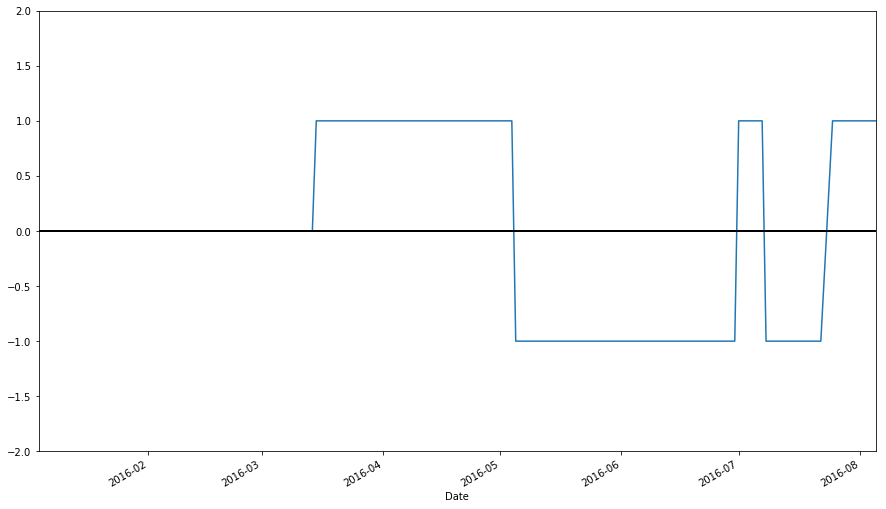

In [20]:
# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
apple["Regime"] = np.where(apple['20d-50d'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
apple["Regime"] = np.where(apple['20d-50d'] < 0, -1, apple["Regime"])
apple.loc['2016-01-01':'2016-08-07',"Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)

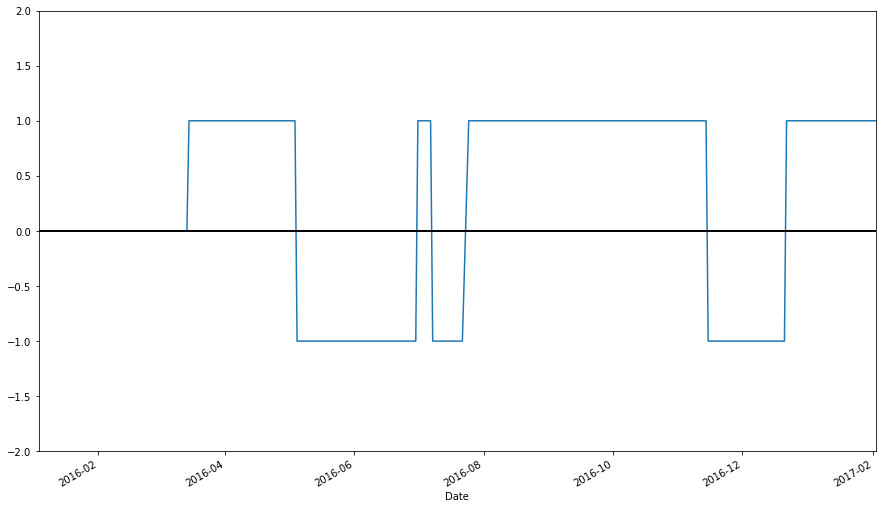

In [21]:
apple["Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)

In [22]:
apple["Regime"].value_counts()

 1    148
-1     77
 0     49
Name: Regime, dtype: int64

In [23]:
# To ensure that all trades close out, I temporarily change the regime of the last row to 0
regime_orig = apple.ix[-1, "Regime"]
apple.ix[-1, "Regime"] = 0
apple["Signal"] = np.sign(apple["Regime"] - apple["Regime"].shift(1))
# Restore original regime data
apple.ix[-1, "Regime"] = regime_orig
apple.tail()

,Open,High,Low,Close,Volume,Adj Close,20d,50d,200d,20d-50d,Regime,Signal
Date,,,,,,,,,,,,
2017-01-27,122.139999,122.349998,121.599998,121.949997,20437400,121.949997,119.05,115.33,107.20,3.72,1.0,0.0
2017-01-30,120.930000,121.629997,120.660004,121.629997,30278800,121.629997,119.29,115.62,107.24,3.67,1.0,0.0
2017-01-31,121.150002,121.389999,120.620003,121.349998,41610600,121.349998,119.57,115.85,107.30,3.72,1.0,0.0
2017-02-01,127.029999,130.490005,127.010002,128.750000,111658100,128.750000,120.20,116.23,107.41,3.97,1.0,0.0
2017-02-02,127.980003,129.389999,127.779999,128.529999,33514400,128.529999,120.83,116.60,107.52,4.23,1.0,-1.0


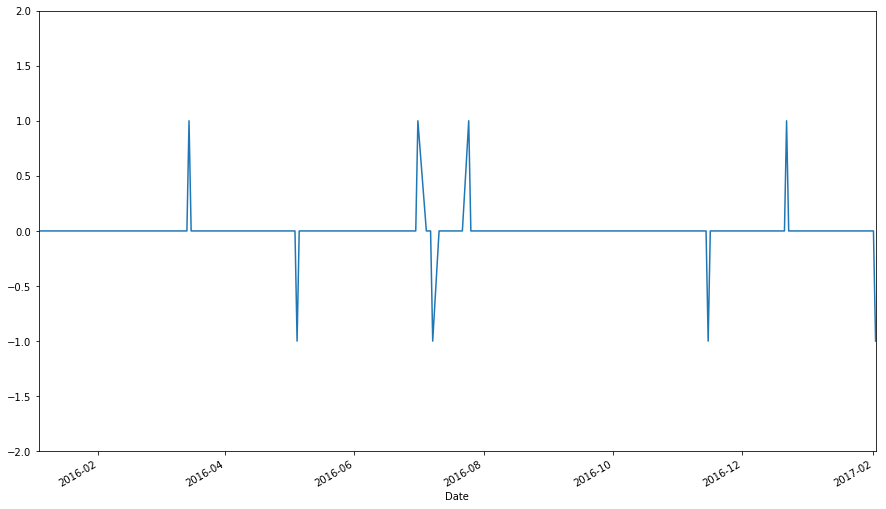

In [24]:
apple["Signal"].plot(ylim = (-2, 2))

In [25]:
apple["Signal"].value_counts()

 0.0    265
-1.0      4
 1.0      4
Name: Signal, dtype: int64

In [26]:
apple.loc[apple["Signal"] == 1, "Close"]

Date
2016-03-15    104.580002
2016-07-01     95.889999
2016-07-25     97.339996
2016-12-22    116.290001
Name: Close, dtype: float64

In [27]:
apple.loc[apple["Signal"] == -1, "Close"]

Date
2016-05-05     93.239998
2016-07-08     96.680000
2016-11-15    107.110001
2017-02-02    128.529999
Name: Close, dtype: float64

In [28]:
# Create a DataFrame with trades, including the price at the trade and the regime under which the trade is made.
apple_signals = pd.concat([
        pd.DataFrame({"Price": apple.loc[apple["Signal"] == 1, "Close"],
                     "Regime": apple.loc[apple["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": apple.loc[apple["Signal"] == -1, "Close"],
                     "Regime": apple.loc[apple["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
apple_signals.sort_index(inplace = True)
apple_signals

,Price,Regime,Signal
Date,,,
2016-03-15,104.580002,1.0,Buy
2016-05-05,93.239998,-1.0,Sell
2016-07-01,95.889999,1.0,Buy
2016-07-08,96.680000,-1.0,Sell
2016-07-25,97.339996,1.0,Buy
2016-11-15,107.110001,-1.0,Sell
2016-12-22,116.290001,1.0,Buy
2017-02-02,128.529999,1.0,Sell


In [29]:
# Let's see the profitability of long trades
apple_long_profits = pd.DataFrame({
        "Price": apple_signals.loc[(apple_signals["Signal"] == "Buy") &
                                  apple_signals["Regime"] == 1, "Price"],
        "Profit": pd.Series(apple_signals["Price"] - apple_signals["Price"].shift(1)).loc[
            apple_signals.loc[(apple_signals["Signal"].shift(1) == "Buy") & (apple_signals["Regime"].shift(1) == 1)].index
        ].tolist(),
        "End Date": apple_signals["Price"].loc[
            apple_signals.loc[(apple_signals["Signal"].shift(1) == "Buy") & (apple_signals["Regime"].shift(1) == 1)].index
        ].index
    })
apple_long_profits

,End Date,Price,Profit
Date,,,
2016-03-15,2016-05-05,104.580002,-11.340004
2016-07-01,2016-07-08,95.889999,0.790001
2016-07-25,2016-11-15,97.339996,9.770005
2016-12-22,2017-02-02,116.290001,12.239998


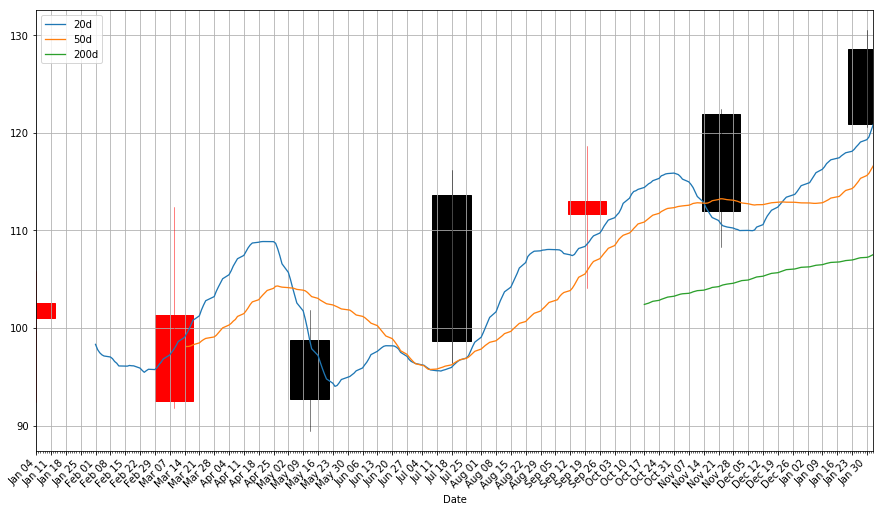

In [30]:
pandas_candlestick_ohlc(apple, stick = 45, otherseries = ["20d", "50d", "200d"])

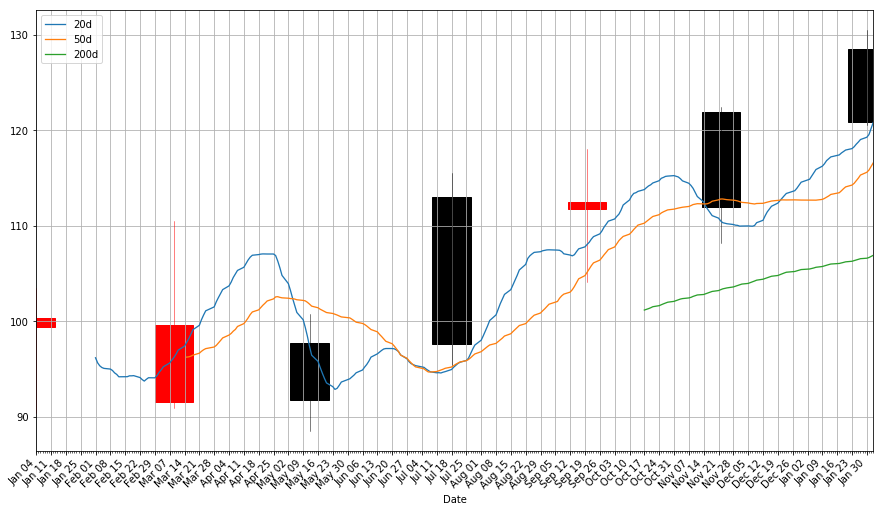

In [31]:
def ohlc_adj(dat):
    """
    :param dat: pandas DataFrame with stock data, including "Open", "High", "Low", "Close", and "Adj Close", with "Adj Close" containing adjusted closing prices
 
    :return: pandas DataFrame with adjusted stock data
 
    This function adjusts stock data for splits, dividends, etc., returning a data frame with
    "Open", "High", "Low" and "Close" columns. The input DataFrame is similar to that returned
    by pandas Yahoo! Finance API.
    """
    return pd.DataFrame({"Open": dat["Open"] * dat["Adj Close"] / dat["Close"],
                       "High": dat["High"] * dat["Adj Close"] / dat["Close"],
                       "Low": dat["Low"] * dat["Adj Close"] / dat["Close"],
                       "Close": dat["Adj Close"]})
 
apple_adj = ohlc_adj(apple)
 
# This next code repeats all the earlier analysis we did on the adjusted data
 
apple_adj["20d"] = np.round(apple_adj["Close"].rolling(window = 20, center = False).mean(), 2)
apple_adj["50d"] = np.round(apple_adj["Close"].rolling(window = 50, center = False).mean(), 2)
apple_adj["200d"] = np.round(apple_adj["Close"].rolling(window = 200, center = False).mean(), 2)
 
apple_adj['20d-50d'] = apple_adj['20d'] - apple_adj['50d']
# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
apple_adj["Regime"] = np.where(apple_adj['20d-50d'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
apple_adj["Regime"] = np.where(apple_adj['20d-50d'] < 0, -1, apple_adj["Regime"])
# To ensure that all trades close out, I temporarily change the regime of the last row to 0
regime_orig = apple_adj.ix[-1, "Regime"]
apple_adj.ix[-1, "Regime"] = 0
apple_adj["Signal"] = np.sign(apple_adj["Regime"] - apple_adj["Regime"].shift(1))
# Restore original regime data
apple_adj.ix[-1, "Regime"] = regime_orig
 
# Create a DataFrame with trades, including the price at the trade and the regime under which the trade is made.
apple_adj_signals = pd.concat([
        pd.DataFrame({"Price": apple_adj.loc[apple_adj["Signal"] == 1, "Close"],
                     "Regime": apple_adj.loc[apple_adj["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": apple_adj.loc[apple_adj["Signal"] == -1, "Close"],
                     "Regime": apple_adj.loc[apple_adj["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
apple_adj_signals.sort_index(inplace = True)
apple_adj_long_profits = pd.DataFrame({
        "Price": apple_adj_signals.loc[(apple_adj_signals["Signal"] == "Buy") &
                                  apple_adj_signals["Regime"] == 1, "Price"],
        "Profit": pd.Series(apple_adj_signals["Price"] - apple_adj_signals["Price"].shift(1)).loc[
            apple_adj_signals.loc[(apple_adj_signals["Signal"].shift(1) == "Buy") & (apple_adj_signals["Regime"].shift(1) == 1)].index
        ].tolist(),
        "End Date": apple_adj_signals["Price"].loc[
            apple_adj_signals.loc[(apple_adj_signals["Signal"].shift(1) == "Buy") & (apple_adj_signals["Regime"].shift(1) == 1)].index
        ].index
    })
 
pandas_candlestick_ohlc(apple_adj, stick = 45, otherseries = ["20d", "50d", "200d"])

In [32]:
apple_adj_long_profits

,End Date,Price,Profit
Date,,,
2016-03-15,2016-05-05,102.858958,-10.595041
2016-06-23,2016-06-27,95.093977,-4.017495
2016-06-30,2016-07-11,94.599212,1.365558
2016-07-25,2016-11-15,96.320994,10.789007
2016-12-21,2017-02-02,117.059998,11.470001


In [33]:
# We need to get the low of the price during each trade.
tradeperiods = pd.DataFrame({"Start": apple_adj_long_profits.index,
                            "End": apple_adj_long_profits["End Date"]})
apple_adj_long_profits["Low"] = tradeperiods.apply(lambda x: min(apple_adj.loc[x["Start"]:x["End"], "Low"]), axis = 1)
apple_adj_long_profits

,End Date,Price,Profit,Low
Date,,,,
2016-03-15,2016-05-05,102.858958,-10.595041,90.879401
2016-06-23,2016-06-27,95.093977,-4.017495,90.542134
2016-06-30,2016-07-11,94.599212,1.365558,93.312826
2016-07-25,2016-11-15,96.320994,10.789007,95.410627
2016-12-21,2017-02-02,117.059998,11.470001,114.760002


In [34]:
# Now we have all the information needed to simulate this strategy in apple_adj_long_profits
cash = 1000000
apple_backtest = pd.DataFrame({"Start Port. Value": [],
                         "End Port. Value": [],
                         "End Date": [],
                         "Shares": [],
                         "Share Price": [],
                         "Trade Value": [],
                         "Profit per Share": [],
                         "Total Profit": [],
                         "Stop-Loss Triggered": []})
port_value = .1  # Max proportion of portfolio bet on any trade
batch = 100      # Number of shares bought per batch
stoploss = .2    # % of trade loss that would trigger a stoploss
for index, row in apple_adj_long_profits.iterrows():
    batches = np.floor(cash * port_value) // np.ceil(batch * row["Price"]) # Maximum number of batches of stocks invested in
    trade_val = batches * batch * row["Price"] # How much money is put on the line with each trade
    if row["Low"] < (1 - stoploss) * row["Price"]:   # Account for the stop-loss
        share_profit = np.round((1 - stoploss) * row["Price"], 2)
        stop_trig = True
    else:
        share_profit = row["Profit"]
        stop_trig = False
    profit = share_profit * batches * batch # Compute profits
    # Add a row to the backtest data frame containing the results of the trade
    apple_backtest = apple_backtest.append(pd.DataFrame({
                "Start Port. Value": cash,
                "End Port. Value": cash + profit,
                "End Date": row["End Date"],
                "Shares": batch * batches,
                "Share Price": row["Price"],
                "Trade Value": trade_val,
                "Profit per Share": share_profit,
                "Total Profit": profit,
                "Stop-Loss Triggered": stop_trig
            }, index = [index]))
    cash = max(0, cash + profit)
 
apple_backtest

,End Date,End Port. Value,Profit per Share,Share Price,Shares,Start Port. Value,Stop-Loss Triggered,Total Profit,Trade Value
2016-03-15,2016-05-05,9.904645e+05,-10.595041,102.858958,900.0,1000000.0000,0.0,-9535.5369,92573.0622
2016-06-23,2016-06-27,9.864470e+05,-4.017495,95.093977,1000.0,990464.4631,0.0,-4017.4950,95093.9770
2016-06-30,2016-07-11,9.878125e+05,1.365558,94.599212,1000.0,986446.9681,0.0,1365.5580,94599.2120
2016-07-25,2016-11-15,9.986015e+05,10.789007,96.320994,1000.0,987812.5261,0.0,10789.0070,96320.9940
2016-12-21,2017-02-02,1.007778e+06,11.470001,117.059998,800.0,998601.5331,0.0,9176.0008,93647.9984


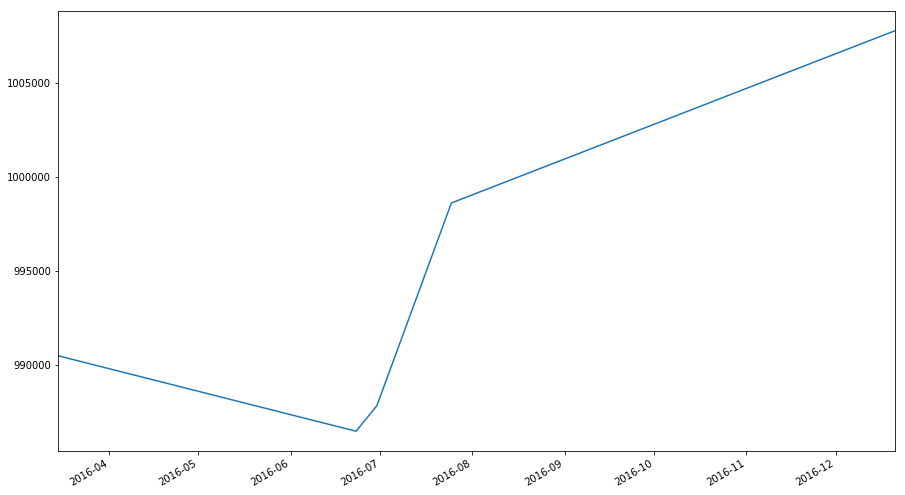

In [35]:
apple_backtest["End Port. Value"].plot()

In [37]:
def ma_crossover_orders(stocks, fast, slow):
    """
    :param stocks: A list of tuples, the first argument in each tuple being a string containing the ticker symbol of each stock (or however you want the stock represented, so long as it's unique), and the second being a pandas DataFrame containing the stocks, with a "Close" column and indexing by date (like the data frames returned by the Yahoo! Finance API)
    :param fast: Integer for the number of days used in the fast moving average
    :param slow: Integer for the number of days used in the slow moving average
 
    :return: pandas DataFrame containing stock orders
 
    This function takes a list of stocks and determines when each stock would be bought or sold depending on a moving average crossover strategy, returning a data frame with information about when the stocks in the portfolio are bought or sold according to the strategy
    """
    fast_str = str(fast) + 'd'
    slow_str = str(slow) + 'd'
    ma_diff_str = fast_str + '-' + slow_str
 
    trades = pd.DataFrame({"Price": [], "Regime": [], "Signal": []})
    for s in stocks:
        # Get the moving averages, both fast and slow, along with the difference in the moving averages
        s[1][fast_str] = np.round(s[1]["Close"].rolling(window = fast, center = False).mean(), 2)
        s[1][slow_str] = np.round(s[1]["Close"].rolling(window = slow, center = False).mean(), 2)
        s[1][ma_diff_str] = s[1][fast_str] - s[1][slow_str]
 
        # np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
        s[1]["Regime"] = np.where(s[1][ma_diff_str] > 0, 1, 0)
        # We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
        s[1]["Regime"] = np.where(s[1][ma_diff_str] < 0, -1, s[1]["Regime"])
        # To ensure that all trades close out, I temporarily change the regime of the last row to 0
        regime_orig = s[1].ix[-1, "Regime"]
        s[1].ix[-1, "Regime"] = 0
        s[1]["Signal"] = np.sign(s[1]["Regime"] - s[1]["Regime"].shift(1))
        # Restore original regime data
        s[1].ix[-1, "Regime"] = regime_orig
 
        # Get signals
        signals = pd.concat([
            pd.DataFrame({"Price": s[1].loc[s[1]["Signal"] == 1, "Close"],
                         "Regime": s[1].loc[s[1]["Signal"] == 1, "Regime"],
                         "Signal": "Buy"}),
            pd.DataFrame({"Price": s[1].loc[s[1]["Signal"] == -1, "Close"],
                         "Regime": s[1].loc[s[1]["Signal"] == -1, "Regime"],
                         "Signal": "Sell"}),
        ])
        signals.index = pd.MultiIndex.from_product([signals.index, [s[0]]], names = ["Date", "Symbol"])
        trades = trades.append(signals)
 
    trades.sort_index(inplace = True)
    trades.index = pd.MultiIndex.from_tuples(trades.index, names = ["Date", "Symbol"])
 
    return trades
 
 
def backtest(signals, cash, port_value = .1, batch = 100):
    """
    :param signals: pandas DataFrame containing buy and sell signals with stock prices and symbols, like that returned by ma_crossover_orders
    :param cash: integer for starting cash value
    :param port_value: maximum proportion of portfolio to risk on any single trade
    :param batch: Trading batch sizes
 
    :return: pandas DataFrame with backtesting results
 
    This function backtests strategies, with the signals generated by the strategies being passed in the signals DataFrame. A fictitious portfolio is simulated and the returns generated by this portfolio are reported.
    """
 
    SYMBOL = 1 # Constant for which element in index represents symbol
    portfolio = dict()    # Will contain how many stocks are in the portfolio for a given symbol
    port_prices = dict()  # Tracks old trade prices for determining profits
    # Dataframe that will contain backtesting report
    results = pd.DataFrame({"Start Cash": [],
                            "End Cash": [],
                            "Portfolio Value": [],
                            "Type": [],
                            "Shares": [],
                            "Share Price": [],
                            "Trade Value": [],
                            "Profit per Share": [],
                            "Total Profit": []})
 
    for index, row in signals.iterrows():
        # These first few lines are done for any trade
        shares = portfolio.setdefault(index[SYMBOL], 0)
        trade_val = 0
        batches = 0
        cash_change = row["Price"] * shares   # Shares could potentially be a positive or negative number (cash_change will be added in the end; negative shares indicate a short)
        portfolio[index[SYMBOL]] = 0  # For a given symbol, a position is effectively cleared
 
        old_price = port_prices.setdefault(index[SYMBOL], row["Price"])
        portfolio_val = 0
        for key, val in portfolio.items():
            portfolio_val += val * port_prices[key]
 
        if row["Signal"] == "Buy" and row["Regime"] == 1:  # Entering a long position
            batches = np.floor((portfolio_val + cash) * port_value) // np.ceil(batch * row["Price"]) # Maximum number of batches of stocks invested in
            trade_val = batches * batch * row["Price"] # How much money is put on the line with each trade
            cash_change -= trade_val  # We are buying shares so cash will go down
            portfolio[index[SYMBOL]] = batches * batch  # Recording how many shares are currently invested in the stock
            port_prices[index[SYMBOL]] = row["Price"]   # Record price
            old_price = row["Price"]
        elif row["Signal"] == "Sell" and row["Regime"] == -1: # Entering a short
            pass
            # Do nothing; can we provide a method for shorting the market?
        #else:
            #raise ValueError("I don't know what to do with signal " + row["Signal"])
 
        pprofit = row["Price"] - old_price   # Compute profit per share; old_price is set in such a way that entering a position results in a profit of zero
 
        # Update report
        results = results.append(pd.DataFrame({
                "Start Cash": cash,
                "End Cash": cash + cash_change,
                "Portfolio Value": cash + cash_change + portfolio_val + trade_val,
                "Type": row["Signal"],
                "Shares": batch * batches,
                "Share Price": row["Price"],
                "Trade Value": abs(cash_change),
                "Profit per Share": pprofit,
                "Total Profit": batches * batch * pprofit
            }, index = [index]))
        cash += cash_change  # Final change to cash balance
 
    results.sort_index(inplace = True)
    results.index = pd.MultiIndex.from_tuples(results.index, names = ["Date", "Symbol"])
 
    return results
 
# Get more stocks
microsoft = data.DataReader("MSFT", "yahoo", start, end)
google = data.DataReader("GOOG", "yahoo", start, end)
facebook = data.DataReader("FB", "yahoo", start, end)
twitter = data.DataReader("TWTR", "yahoo", start, end)
netflix = data.DataReader("NFLX", "yahoo", start, end)
amazon = data.DataReader("AMZN", "yahoo", start, end)
yahoo = data.DataReader("YHOO", "yahoo", start, end)
sony = data.DataReader("SNY", "yahoo", start, end)
nintendo = data.DataReader("NTDOY", "yahoo", start, end)
ibm = data.DataReader("IBM", "yahoo", start, end)
hp = data.DataReader("HPQ", "yahoo", start, end)

In [38]:
signals = ma_crossover_orders([("AAPL", ohlc_adj(apple)),
                              ("MSFT",  ohlc_adj(microsoft)),
                              ("GOOG",  ohlc_adj(google)),
                              ("FB",    ohlc_adj(facebook)),
                              ("TWTR",  ohlc_adj(twitter)),
                              ("NFLX",  ohlc_adj(netflix)),
                              ("AMZN",  ohlc_adj(amazon)),
                              ("YHOO",  ohlc_adj(yahoo)),
                              ("SNY",   ohlc_adj(yahoo)),
                              ("NTDOY", ohlc_adj(nintendo)),
                              ("IBM",   ohlc_adj(ibm)),
                              ("HPQ",   ohlc_adj(hp))],
                            fast = 20, slow = 50)
signals

Price  Regime Signal
Date       Symbol                           
2016-03-15 AAPL    102.858958     1.0    Buy
           AMZN    577.020020    -1.0   Sell
           FB      110.669998     1.0    Buy
           GOOG    728.330017    -1.0   Sell
           HPQ      11.101380     1.0    Buy
           IBM     139.119036     1.0    Buy
           MSFT     52.533246     1.0    Buy
           NFLX     97.860001    -1.0   Sell
           NTDOY    17.400000     1.0    Buy
           SNY      33.259998     1.0    Buy
           TWTR     16.190001     1.0    Buy
           YHOO     33.259998     1.0    Buy
2016-03-17 AMZN    559.440002     1.0    Buy
           GOOG    737.780029     1.0    Buy
2016-03-21 NFLX    101.059998     1.0    Buy
2016-04-01 TWTR     15.980000    -1.0   Sell
2016-05-04 MSFT     48.886600    -1.0   Sell
           NFLX     90.790001    -1.0   Sell
2016-05-05 AAPL     92.263917    -1.0   Sell
           GOOG    701.429993    -1.0   Sell
2016-05-17 HPQ      11.227975    -1.0   Sell
           NTDOY    18.170000    -1.0   Sell
2016-05-20 IBM     144.676629    -1.0   Sell
2016-05-27 IBM     150.168934     1.0    Buy
2016-06-07 HPQ      13.331394     1.0    Buy
2016-06-08 NTDOY    19.350000     1.0    Buy
2016-06-14 NFLX     94.120003     1.0    Buy
2016-06-17 NTDOY    17.610001     0.0   Sell
2016-06-20 NTDOY    17.950001    -1.0   Sell
2016-06-23 AAPL     95.093977     1.0    Buy
...                       ...     ...    ...
2016-11-01 HPQ      14.229053    -1.0   Sell
2016-11-08 FB      124.220001    -1.0   Sell
2016-11-10 AMZN    742.380005    -1.0   Sell
2016-11-15 AAPL    107.110001    -1.0   Sell
2016-11-18 GOOG    760.539978    -1.0   Sell
           HPQ      15.736241     1.0    Buy
           IBM     160.389999     1.0    Buy
2016-12-12 NTDOY    32.090000     1.0    Buy
           TWTR     18.930000     1.0    Buy
2016-12-21 AAPL    117.059998     1.0    Buy
           NTDOY    25.730000    -1.0   Sell
2016-12-23 GOOG    789.909973     1.0    Buy
2016-12-29 TWTR     16.389999    -1.0   Sell
2017-01-09 AMZN    796.919983     1.0    Buy
2017-01-10 HPQ      14.690000    -1.0   Sell
2017-01-12 FB      126.620003     1.0    Buy
2017-01-20 SNY      42.049999     1.0    Buy
           YHOO     42.049999     1.0    Buy
2017-02-02 AAPL    128.529999     1.0   Sell
           AMZN    839.950012     1.0   Sell
           FB      130.839996     1.0   Sell
           GOOG    798.530029     1.0   Sell
           HPQ      15.210000    -1.0    Buy
           IBM     174.580002     1.0   Sell
           MSFT     63.169998     1.0   Sell
           NFLX    139.199997     1.0   Sell
           NTDOY    25.090000    -1.0    Buy
           SNY      43.689999     1.0   Sell
           TWTR     17.780001    -1.0    Buy
           YHOO     43.689999     1.0   Sell

[90 rows x 3 columns]

In [39]:
bk = backtest(signals, 1000000)
bk

End Cash  Portfolio Value  Profit per Share  \
Date       Symbol                                                    
2016-03-15 AAPL    9.074269e+05     1.000000e+06          0.000000   
           AMZN    9.074269e+05     1.000000e+06          0.000000   
           FB      8.078239e+05     1.000000e+06          0.000000   
           GOOG    8.078239e+05     1.000000e+06          0.000000   
           HPQ     7.079115e+05     1.000000e+06          0.000000   
           IBM     6.105282e+05     1.000000e+06          0.000000   
           MSFT    5.107150e+05     1.000000e+06          0.000000   
           NFLX    5.107150e+05     1.000000e+06          0.000000   
           NTDOY   4.115350e+05     1.000000e+06          0.000000   
           SNY     3.117550e+05     1.000000e+06          0.000000   
           TWTR    2.129960e+05     1.000000e+06          0.000000   
           YHOO    1.132160e+05     1.000000e+06          0.000000   
2016-03-17 AMZN    5.727203e+04     1.000000e+06          0.000000   
           GOOG   -1.650597e+04     1.000000e+06          0.000000   
2016-03-21 NFLX   -1.074600e+05     1.000000e+06          0.000000   
2016-04-01 TWTR   -9.981968e+03     9.987190e+05         -0.210001   
2016-05-04 MSFT    8.290257e+04     9.917904e+05         -3.646646   
           NFLX    1.646136e+05     9.825474e+05        -10.269997   
2016-05-05 AAPL    2.476511e+05     9.730118e+05        -10.595041   
           GOOG    3.177941e+05     9.693768e+05        -36.350036   
2016-05-17 HPQ     4.188459e+05     9.705162e+05          0.126595   
           NTDOY   5.224149e+05     9.749052e+05          0.770000   
2016-05-20 IBM     6.236885e+05     9.787955e+05          5.557593   
2016-05-27 IBM     5.335872e+05     9.787955e+05          0.000000   
2016-06-07 HPQ     4.362680e+05     9.787955e+05          0.000000   
2016-06-08 NTDOY   3.395180e+05     9.787955e+05          0.000000   
2016-06-14 NFLX    2.453980e+05     9.787955e+05          0.000000   
2016-06-17 NTDOY   3.334480e+05     9.700955e+05         -1.739999   
2016-06-20 NTDOY   3.334480e+05     9.700955e+05         -1.399999   
2016-06-23 AAPL    2.383540e+05     9.700955e+05          0.000000   
...                         ...              ...               ...   
2016-11-01 HPQ     5.080663e+05     1.033131e+06          0.897659   
2016-11-08 FB      6.074423e+05     1.035203e+06          2.590004   
2016-11-10 AMZN    6.816803e+05     1.053497e+06        182.940003   
2016-11-15 AAPL    7.887903e+05     1.064286e+06         10.789007   
2016-11-18 GOOG    8.648443e+05     1.061746e+06        -25.400024   
           HPQ     7.594115e+05     1.061746e+06          0.000000   
           IBM     6.631775e+05     1.061746e+06          0.000000   
2016-12-12 NTDOY   5.572805e+05     1.061746e+06          0.000000   
           TWTR    4.512725e+05     1.061746e+06          0.000000   
2016-12-21 AAPL    3.459185e+05     1.061746e+06          0.000000   
           NTDOY   4.308275e+05     1.040758e+06         -6.360000   
2016-12-23 GOOG    3.518365e+05     1.040758e+06          0.000000   
2016-12-29 TWTR    4.436205e+05     1.026534e+06         -2.540001   
2017-01-09 AMZN    3.639285e+05     1.026534e+06          0.000000   
2017-01-10 HPQ     4.623515e+05     1.019524e+06         -1.046241   
2017-01-12 FB      3.610555e+05     1.019524e+06          0.000000   
2017-01-20 SNY     2.601355e+05     1.019524e+06          0.000000   
           YHOO    1.592155e+05     1.019524e+06          0.000000   
2017-02-02 AAPL    2.748925e+05     1.029847e+06         11.470001   
           AMZN    3.588875e+05     1.034150e+06         43.030029   
           FB      4.635595e+05     1.037526e+06          4.219993   
           GOOG    5.434125e+05     1.038388e+06          8.620056   
           HPQ     5.434125e+05     1.038388e+06         -0.526241   
           IBM     6.481605e+05     1.046902e+06         14.190003   
           MSFT    7.555495e+05  

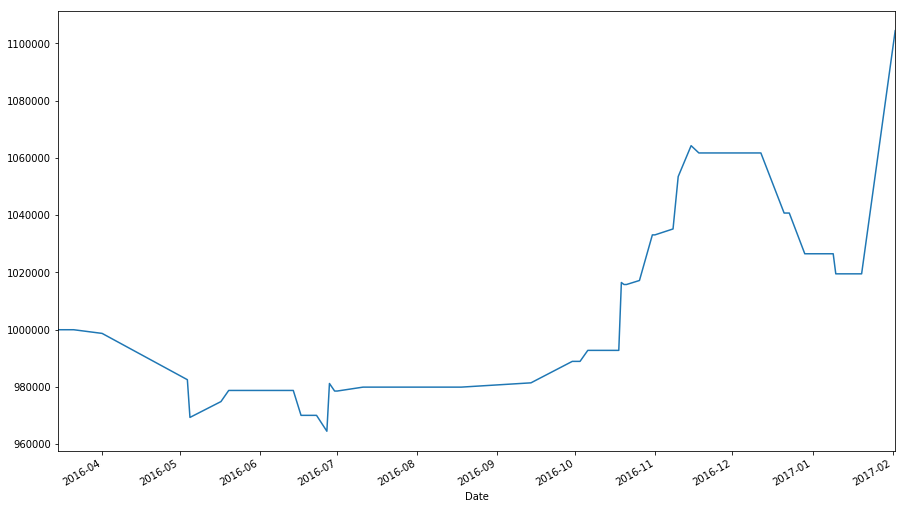

In [40]:
bk["Portfolio Value"].groupby(level = 0).apply(lambda x: x[-1]).plot()

In [42]:
spyder = data.DataReader("SPY", "yahoo", start, end)
spyder.iloc[[0,-1],:]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,200.490005,201.029999,198.589996,201.020004,222353500,196.794026
2017-02-02,227.619995,228.100006,226.820007,227.770004,67943600,227.770004


In [43]:
batches = 1000000 // np.ceil(100 * spyder.ix[0,"Adj Close"]) # Maximum number of batches of stocks invested in
trade_val = batches * batch * spyder.ix[0,"Adj Close"] # How much money is used to buy SPY
final_val = batches * batch * spyder.ix[-1,"Adj Close"] + (1000000 - trade_val) # Final value of the portfolio
final_val

1154879.8900000001

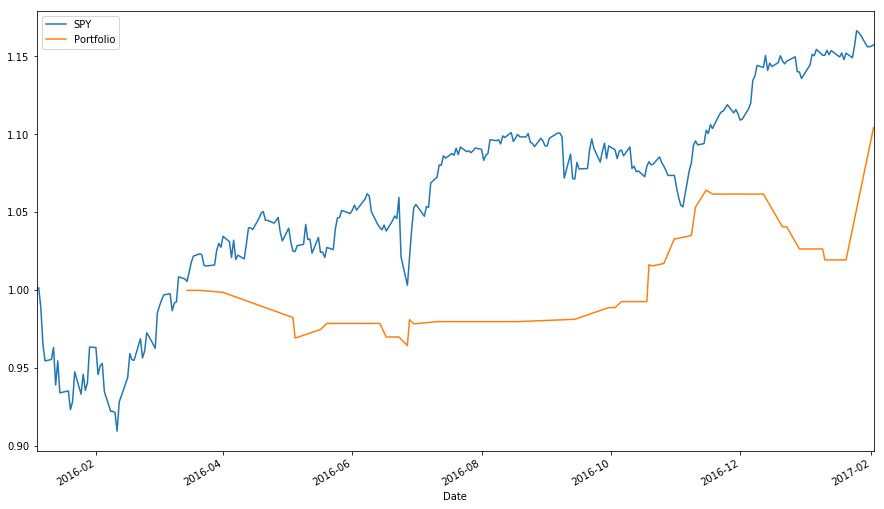

In [44]:
# We see that the buy-and-hold strategy beats the strategy we developed earlier. I would also like to see a plot.
ax_bench = (spyder["Adj Close"] / spyder.ix[0, "Adj Close"]).plot(label = "SPY")
ax_bench = (bk["Portfolio Value"].groupby(level = 0).apply(lambda x: x[-1]) / 1000000).plot(ax = ax_bench, label = "Portfolio")
ax_bench.legend(ax_bench.get_lines(), [l.get_label() for l in ax_bench.get_lines()], loc = 'best')
ax_bench